In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files

uploaded = files.upload()
import pandas as pd

Saving togo-dapaong_qc.csv to togo-dapaong_qc.csv


In [5]:
import pandas as pd

df = pd.read_csv("togo-dapaong_qc.csv")

df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [ ]:

df.info()


df.describe()


missing_report = df.isna().sum()
missing_report = missing_report[missing_report > 0]
missing_report


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

,0
Comments,525600


In [6]:
from scipy.stats import zscore
import numpy as np


cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']


z_scores = df[cols_to_check].apply(zscore)


outliers = (np.abs(z_scores) > 3)


outliers.sum()

,0
GHI,305
DNI,1062
DHI,3415
ModA,137
ModB,206
WS,3510
WSgust,3915


In [7]:

for col in cols_to_check:
    median = df[col].median()
    df.loc[outliers[col], col] = median

In [8]:
import os
os.makedirs('data', exist_ok=True)

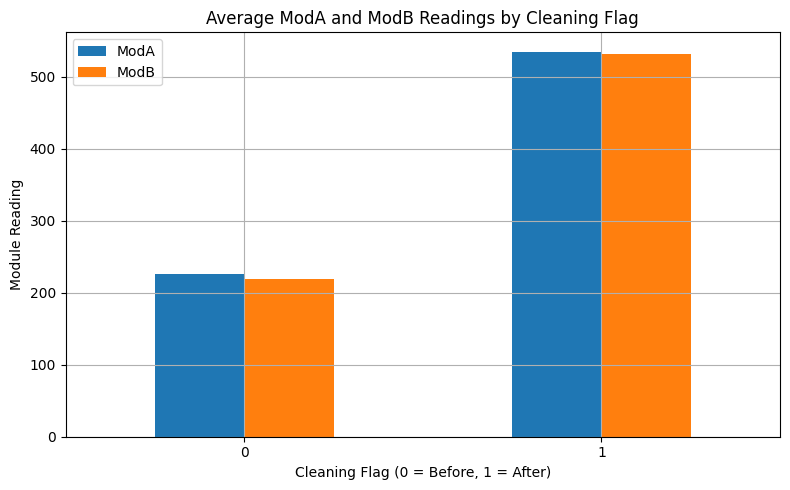

In [9]:
cleaning_effect = df.groupby('Cleaning')[['ModA', 'ModB']].mean()


cleaning_effect.plot(kind='bar', figsize=(8, 5))
plt.title('Average ModA and ModB Readings by Cleaning Flag')
plt.xlabel('Cleaning Flag (0 = Before, 1 = After)')
plt.ylabel('Module Reading')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

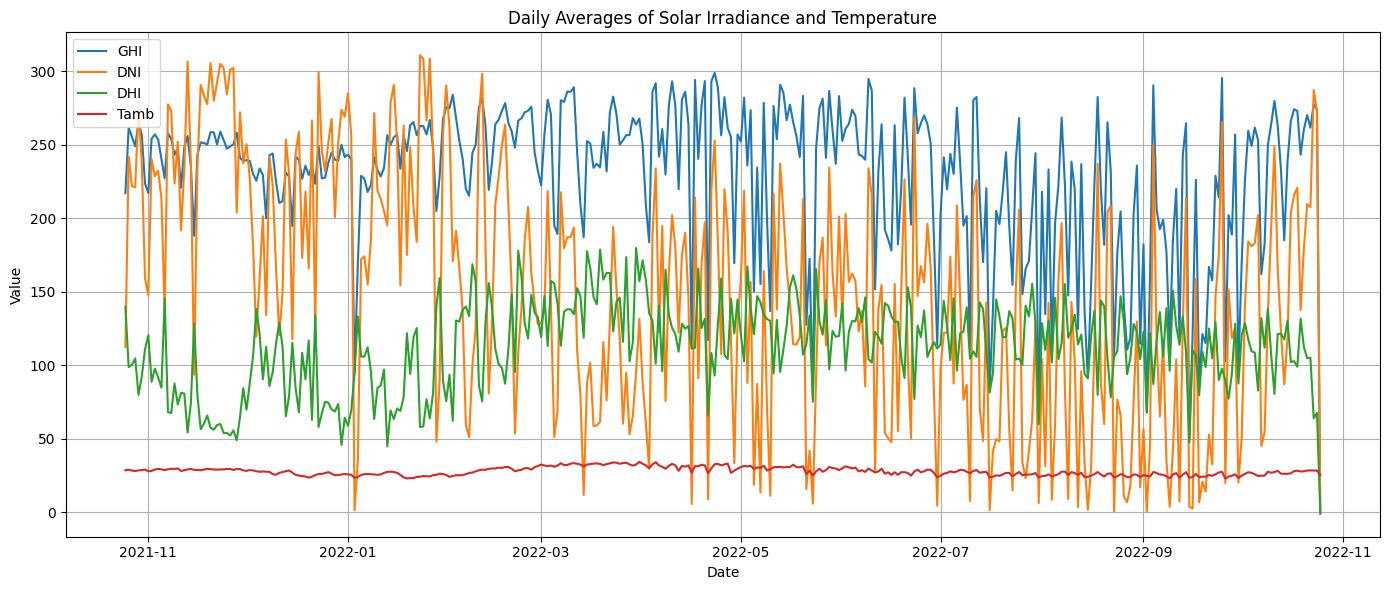

In [10]:
import matplotlib.pyplot as plt


df['Timestamp'] = pd.to_datetime(df['Timestamp'])


df_daily = df.resample('D', on='Timestamp').mean()


plt.figure(figsize=(14, 6))
plt.plot(df_daily.index, df_daily['GHI'], label='GHI')
plt.plot(df_daily.index, df_daily['DNI'], label='DNI')
plt.plot(df_daily.index, df_daily['DHI'], label='DHI')
plt.plot(df_daily.index, df_daily['Tamb'], label='Tamb')
plt.title('Daily Averages of Solar Irradiance and Temperature')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


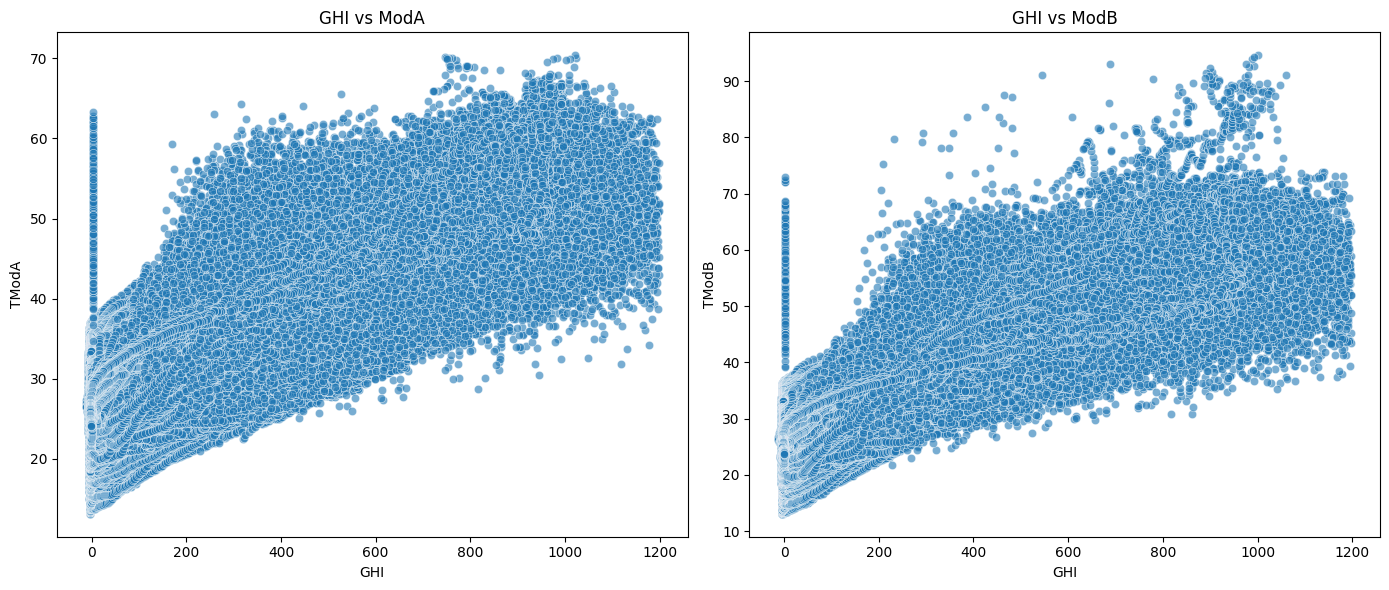

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(ax=axes[0], data=df, x='GHI', y='TModA', alpha=0.6)
axes[0].set_title('GHI vs ModA')

sns.scatterplot(ax=axes[1], data=df, x='GHI', y='TModB', alpha=0.6)
axes[1].set_title('GHI vs ModB')

plt.tight_layout()
plt.show()

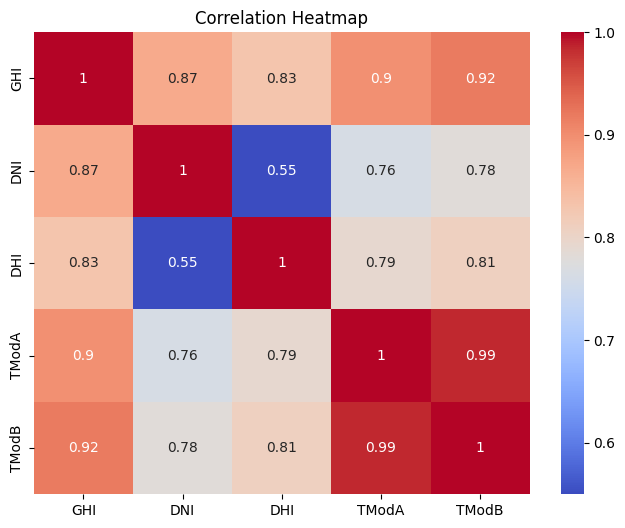

In [12]:
import seaborn as sns


corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr = df[corr_columns].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()